In [2]:
# Import necessary libraries
import pandas as pd
from collections import Counter

# Load the dataset
file_path = 'path_to_your_file.csv'  # Replace with your file path
mental_health_data = pd.read_csv('/content/mental_health_trends_corrected.csv')

# Split the data into two groups: before 1990 and 1990 or later
pre_internet_data = mental_health_data[mental_health_data['Survey_Year'] < 1990]
post_internet_data = mental_health_data[mental_health_data['Survey_Year'] >= 1990]

# Define a function to count word occurrences in the specified text column
def word_count(data, column_name):
    # Drop NA values and concatenate all text entries into one large string
    text_data = ' '.join(data[column_name].dropna().astype(str).tolist())
    # Split the large string into individual words and count each word's occurrences
    word_counts = Counter(text_data.split())
    return word_counts

# Calculate word counts for 'Self_Reported_Challenges' column for both time periods
pre_internet_word_count = word_count(pre_internet_data, 'Self_Reported_Challenges')
post_internet_word_count = word_count(post_internet_data, 'Self_Reported_Challenges')

# Convert the word counts to DataFrames for easier viewing and comparison
pre_internet_word_df = pd.DataFrame(pre_internet_word_count.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
post_internet_word_df = pd.DataFrame(post_internet_word_count.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

# Display the word count dataframes
print("Word Count Before 1990")
print(pre_internet_word_df.head(10))  # Display top 10 words before 1990

print("\nWord Count After 1990")
print(post_internet_word_df.head(10))  # Display top 10 words after 1990


Word Count Before 1990
          Word  Count
6           of   1417
5         fear    859
7      missing    859
8          out    859
0  overwhelmed    797
4      anxiety    671
2   exhaustion    638
3      burnout    638
1   loneliness    634
9       stress    614

Word Count After 1990
           Word  Count
1            of   1183
10  overwhelmed    703
0          fear    691
2       missing    691
3           out    691
9       anxiety    579
6    exhaustion    562
11       stress    536
5    loneliness    516
4       burnout    512


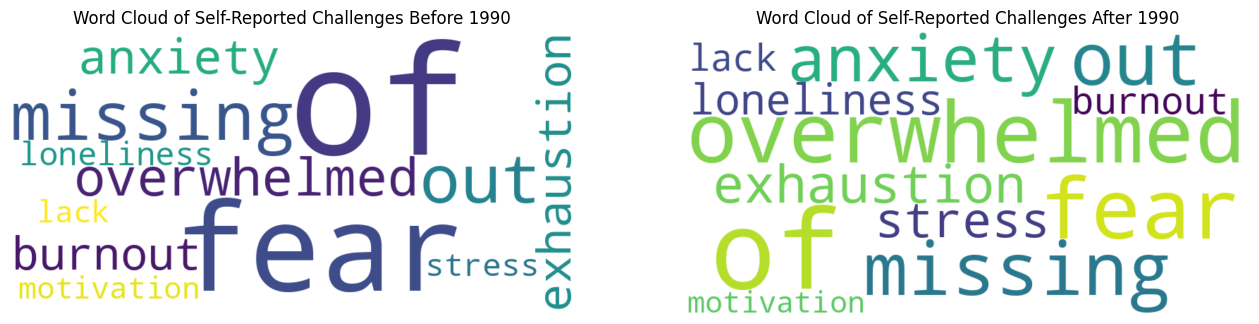

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming pre_internet_word_count and post_internet_word_count are available as dictionaries

# Generate word cloud for pre-internet data
pre_internet_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pre_internet_word_count)

# Generate word cloud for post-internet data
post_internet_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(post_internet_word_count)

# Plotting the word clouds side by side
plt.figure(figsize=(16, 8))

# Pre-internet word cloud
plt.subplot(1, 2, 1)
plt.imshow(pre_internet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Self-Reported Challenges Before 1990")

# Post-internet word cloud
plt.subplot(1, 2, 2)
plt.imshow(post_internet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Self-Reported Challenges After 1990")

plt.show()


In [16]:
import pandas as pd
import plotly.express as px

# Load the dataset

# Filter for specific indicator (e.g., Depression_Prevalence)
indicator = 'Depression_Prevalence'

# Create choropleth map with time slider
fig = px.choropleth(
    mental_health_data,
    locations="Country",
    locationmode="country names",
    color=indicator,
    animation_frame="Survey_Year",
    color_continuous_scale="Reds",
    title=f"Geographical Hot Zones for {indicator} Over Time"
)

# Show map with time slider
fig.show()




In [22]:
import plotly.graph_objects as go

# Calculate averages for internet usage and mental health indicator by year
yearly_data = mental_health_data.groupby("Survey_Year")[['Internet_Usage_Hours_Per_Day', 'Depression_Prevalence']].mean().reset_index()

# Create a figure with dual y-axes
fig = go.Figure()

# First y-axis for internet usage
fig.add_trace(go.Scatter(x=yearly_data['Survey_Year'], y=yearly_data['Internet_Usage_Hours_Per_Day'],
                         mode='lines', name='Internet Usage (Hours/Day)', yaxis='y1'))

# Second y-axis for the mental health indicator
fig.add_trace(go.Scatter(x=yearly_data['Survey_Year'], y=yearly_data['Depression_Prevalence'],
                         mode='lines', name='Depression Prevalence', yaxis='y2'))

# Update layout with dual y-axes
fig.update_layout(
    title="Internet Usage vs Depression Prevalence Over Time",
    xaxis_title="Year",
    yaxis=dict(title="Internet Usage (Hours/Day)", side='left'),
    yaxis2=dict(title="Depression Prevalence (%)", overlaying='y', side='right')
)

fig.show()
